<a href="https://colab.research.google.com/github/jongjong2323/colab01/blob/main/4_13_466p_~488p_(%EC%97%B0%EC%8A%B5_%EB%AC%B8%EC%A0%9C_489p_~497p_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout,Activation,Flatten
from tensorflow.python.keras.optimizers import adam_v2
optimizers = adam_v2.Adam()
img_size = 64 #이미지의 폭과 높이
n_channel = 3 #채널 수
n_mid = 256 #중간층의 뉴런 수
batch_size = 32
epochs = 20 
#각 설정

In [ ]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_size,img_size,n_channel))
model_vgg16.summary()
#VGG16의 도입

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

Original size: (10000, 32, 32, 3)
Input size: (10000, 64, 64, 3)


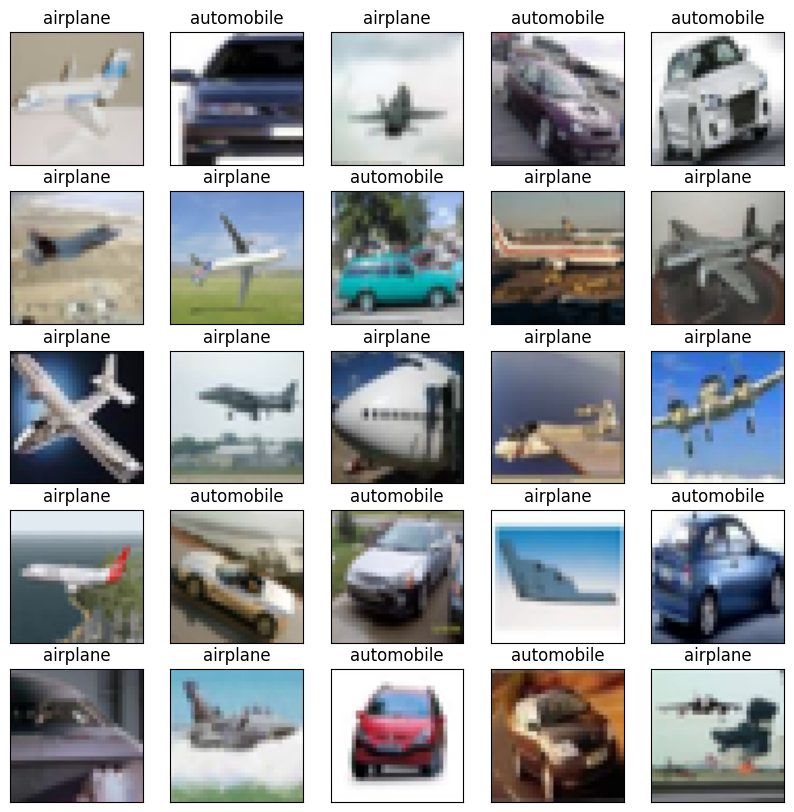

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,t_train),(x_test,t_test) = cifar10.load_data()
#라벨이 0과 1의 데이터만 꺼낸다
t_train = t_train.reshape(-1)
t_test = t_test.reshape(-1)
x_train = x_train[t_train <= 1]
t_train = t_train[t_train <= 1]
x_test = x_test[t_test <= 1]
t_test = t_test[t_test <= 1]
print('Original size:',x_train.shape)
#이미지를 2배로 확대
x_train = x_train.repeat(2, axis=1).repeat(2, axis=2)
x_test = x_test.repeat(2, axis=1).repeat(2, axis=2)
print('Input size:', x_train.shape)
n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)
cifar10_labels = np.array(['airplane','automobile'])
plt.figure(figsize=(10,10))  #표시 영역의 크기
for i in range(n_image):
  cifar_img=plt.subplot(5,5,i+1)
  plt.imshow(x_train[rand_idx[i]])
  label = cifar10_labels[t_train[rand_idx[i]]]
  plt.title(label)
  plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  #라벨과 눈금을 비표시로
#CIFAR-10의 도입입

In [ ]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())  #1차원의 배열로 변환
model.add(Dense(n_mid))
model.add(Activation('relu'))
model.add(Dropout(0.5))   #드롭 아웃
model.add(Dense(1))
model.add(Activation('sigmoid'))
model_vgg16.trainable = False  #훈련한 층은 훈련하지 않는다
model.compile(optimizer=adam_v2.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
#model.summary()
#전이 학습용의 모델을 구축한다

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train = x_train/255 #0에서 1의 범위에 넣는다
x_test = x_test/255
#데이터 확장
generator = ImageDataGenerator(rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=10,zoom_range=0.2,horizontal_flip=True)
generator.fit(x_train)
#훈련
history = model.fit(generator.flow(x_train, t_train, batch_size=batch_size),epochs=epochs,validation_data=(x_test, t_test))
#모델의 학습

Epoch 1/20
   6416/Unknown - 424s 66ms/step - loss: 0.1694 - accuracy: 0.9318

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']  #훈련용 데이터의 오차
train_acc = history.history['accuracy']  #훈련용 데이터의 정밀도
val_loss = history.history['val_loss']    #검증용 데이터의 오차
val_acc = history.history['val_accuracy']  #검증용 데이터의 정밀도
plt.plot(np.arange(len(train_loss)),train_loss, label='loss')
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.legend()
plt.show()
plt.plot(np.arange(len(train_acc)),train_acc,label='acc')
plt.plot(np.arange(len(val_acc)),val_acc,label='val_acc')
plt.legend()
plt.show()
#학습의 추이를 표시한다

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten
from tensorflow.python.keras.optimizers import adam_v2
optimizer = adam_v2.Adam()
img_size = 64 #이미지의 폭과 높이
n_channel = 3 #채널 수
n_mid = 256 #중간층의 뉴런수
batch_size = 32
epochs = 20
#각 설정

In [ ]:
from  tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(img_size,img_size,n_channel)) #입력의 형태
model_vgg16.summary()
#VGG16의 도입

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, t_train),(x_test,t_test) = cifar10.load_data()
#라벨이 0과 1의 데이터만 꺼낸다
t_train = t_train.reshape(-1)
t_test = t_test.reshape(-1)
x_train = x_train[t_train <= 1]
t_train = t_train[t_train <= 1]
x_test = x_test[t_test <= 1]
t_test = t_test[t_test <= 1]
print('Original size:',x_train.shape)
#이미지를 확대
x_train = x_train.repeat(2, axis=1).repeat(2, axis=2)
x_test = x_test.repeat(2, axis=1).repeat(2, axis=2)
print('Input size:', x_train.shape)
#CIFAR-10 읽어 들이기기

Original size: (10000, 32, 32, 3)
Input size: (10000, 64, 64, 3)


In [ ]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())  #1차원의 배열로 변환
model.add(Dense(n_mid))
model.add(Activation('relu'))
model.add(Dropout(0.5))   #드롭 아웃
model.add(Dense(1))
model.add(Activation('sigmoid'))
#block5만 훈련한다
for layer in model_vgg16.layers:
  if layer.name.startswith('block5_conv'):
    layer.trainable = True
  else:
    layer.trainable = False
model.compile(optimizer=adam_v2.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
#model.summary()
#파인 튜닝용 모델을 구축한다

ValueError: ignored

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
x_train = x_train/255 #0에서 1의 범위에 넣는다
x_test = x_test/255 
#데이터 확장
generator = ImageDataGenerator(rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,shear_range=10,zoom_range=0.2,horizontal_flip=True)
generator.fit(x_train)
#훈련
history = model.fit(generator.flow(x_train,t_train,batch_size=batch_size),epochs=epochs,validation_data=(x_test,t_test))
#모델의 학습

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']      #훈련용 데이터의 오차
train_acc = history.history['accuracy']   #훈련용 데이터의 정밀도
val_loss = history.history['val_loss']    #검증용 데이터의 오차
val_acc = history.history['val_accuracy'] #검증용 데이터의 정밀도
plt.plot(np.arange(len(train_loss)),train_loss,label='loss')
plt.plot(np.arange(len(val_loss)),val_loss,label='val_loss')
plt.legend()
plt.show()
plt.plot(np.arange(len(train_acc)),train_acc,label='acc')
plt.plot(np.arange(len(val_acc)),val_acc,label='val_acc')
plt.legend()
plt.show()
#학습이 추이를 표시한다